<a href="https://colab.research.google.com/github/changingnicknamebrb/AICourseHomeWork/blob/main/homework_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Знакомство с Google Colab](https://colab.research.google.com/drive/165RMZptKVyl7OKNt0jTiVAUcE76uBme0)
2. [Знакомство с GitHub](https://colab.research.google.com/drive/1pAr69aYkwU61_56PyK1ahnE930VSx2MM)
3. [Нейросети как сервис. Как сделать свой сервис на предобученных моделях](https://colab.research.google.com/drive/11rJ3Qmuh9UHgWSjDr13us9tLF0dHCyLS)
4. Домашняя работа

В качестве домашнего задания мы хотим вам дать 2 задания:

1. Творческое задание. Мы хотим, чтобы вы проявили свои творческие способности и поигралися с моделью **StableDiffusion**.
2. Создайте себе профиль на GitHub.

**Выполнение домашней работы:**

1.   Скопируйте блокнот (если забыли, см. урок 1.1. Знакомство с Google Colab).
2.   Переименуйте блокнот, в любое имя на ваш выбор.
3.   Переведите среду выполнения в режим T4 GPU (1.3. Нейросети как сервис. Как сделать свой сервис на предобученных моделях).
4.   Выполните ячейку с "Необходимыми функциями".
5.   Добавте свои ячейки с 5 разными эксперементами (функция *createImagesStableDiffusion()* из прошлого блокнота, укажите 5 разных текста для генерации картинок).
6.   Поделитесь блокнотом (общий доступ) с Куратором.
7.   Создайте себе профиль на GitHub.
8.   Создайте на GitHub публичный репозитарий с именем как ваш никнейм.
9.   Добавьте в него файл README.md (вы также можете отметить галочку "Add a README file" при добавлении репозитория и он будет создан автоматически) и оформите его на свое усмотрение.
10.  Отправьте ссылку на ваш профиль в GitHub куратору.


Возникнут вопросы, не стесняйтесь обратиться за помощью к Куратору, он вам обязательно поможет.

In [1]:
#@title Необходимые функции
!pip install jax==0.4.23 jaxlib==0.4.23
!pip -q install diffusers
!pip -q install transformers scipy ftfy accelerate
!pip -q install "ipywidgets>=7,<8"
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

from google.colab import output
output.enable_custom_widget_manager()

stableDiffusion = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16)
stableDiffusion = stableDiffusion.to("cuda")


def createImagesStableDiffusion(prompt='', rows=2, cols=2, iteration=20):
  # Запускаем генерацию
  images =  stableDiffusion([prompt] * (rows*cols), num_inference_steps=iteration).images
  w, h = images[0].size
  grid = Image.new('RGB', size=(cols*w, rows*h))
  grid_w, grid_h = grid.size

  for i, img in enumerate(images):
      grid.paste(img, box=(i%cols*w, i//cols*h))
  display(grid)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.26+cuda12.cudnn89
    Uninstalling jaxlib-0.4.26+cuda12.cudnn89:
      Successfully uninstalled jaxlib-0.4.26+cuda12.cudnn89
  Attempting uninstall: jax
    Found existing installation: jax 0.4.26
    Uninstalling jax-0.4.26:
      Successfully uninstalled jax-0.4.26
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.3 MB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis-

  0%|          | 0/20 [00:00<?, ?it/s]

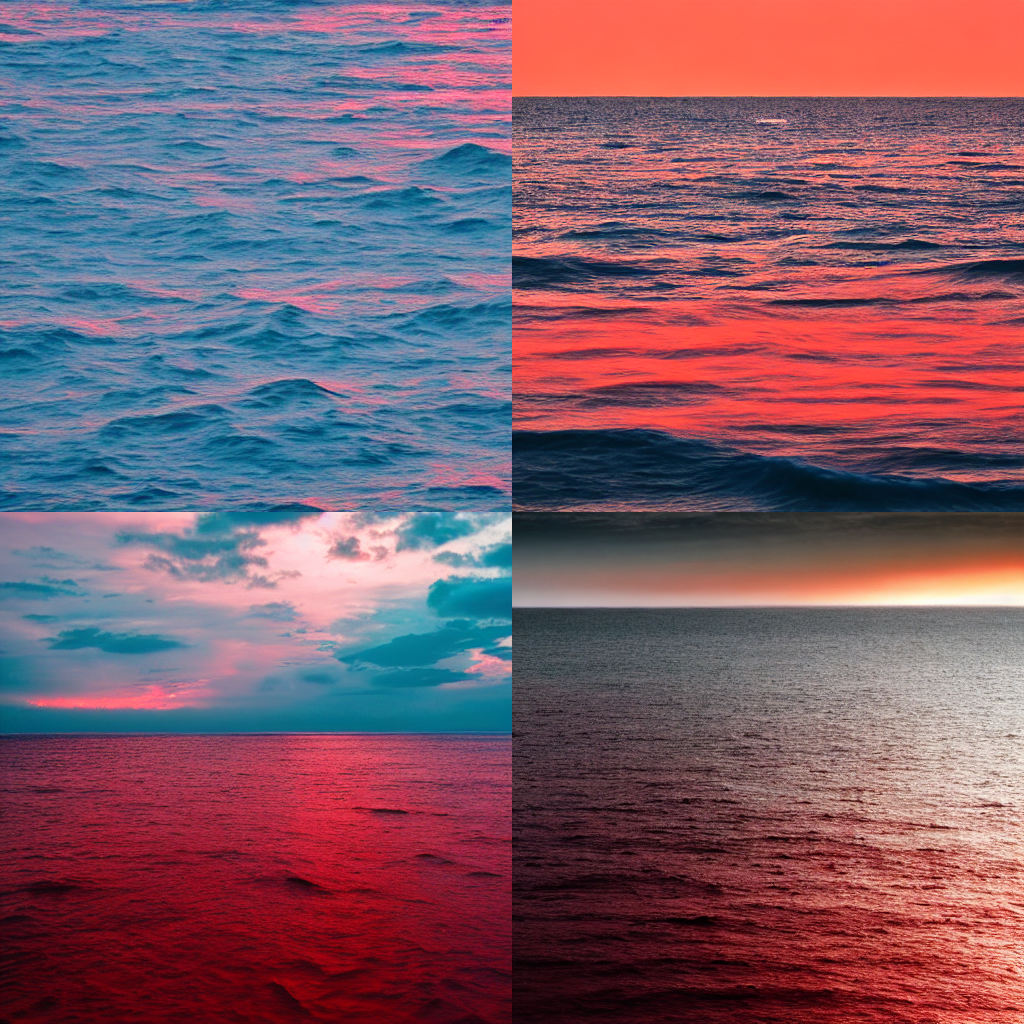

In [17]:
# Изменяя текст в кавычках получайте различные изображени. Вам необходимо получить 5 разных генераций, которыми вы захотите поделиться с Куратором :)
# createImagesStableDiffusion('Salvador Dali walks down the street with a cockroach on a leash, city, surrealism, crowded, people turn around, 8k, highly detailed, –ar 16:9 ', 2, 2, 100)
# createImagesStableDiffusion('A snowy mountain is blowning up, revealing a dormant volcano')
# createImagesStableDiffusion('World War II military poster image')
# createImagesStableDiffusion('Unspeakable Lovecraftian horror emerging from the depths of the ocean')
# createImagesStableDiffusion('A girl with bunny ears hopping around a campfire, cartoon style')
# createImagesStableDiffusion('A vast sea, filled with red hue of a dusk')